# Final project deliverable 1

Hi, for the final project i decided to go with something relatively simple but also quirky. 

For this final project I will be using online medicine review to predict the likely rating of a new drug based on the type of condition it treats, as well as its effectiveness and side effects. This is essentially a data mining project I guess but i will be using machine learning with it. Cool beans.

The link to this dataset is as follows: 

https://www.kaggle.com/datasets/rabieelkharoua/patient-ratings-identifying-best-drugs/data

Which is taken from:

https://www.semanticscholar.org/paper/Aspect-Based-Sentiment-Analysis-of-Drug-Reviews-and-Gr%C3%A4%C3%9Fer-Kallumadi/4d7c25fe6131a79dfec9f45b70b270f400ac2b4f

The dataset I will be using specifically will be from the Druglib.com website that was gathered for the paper above. 

While there are notebooks made with this dataset. None at the time of me writing this are doing what I am doing. The dataset seems to be more suited for NLP but I will be using this dataset to do regression. 

Github repository:

https://github.com/yiliu7724/5509-final-project

### Project topic

So let's say we are a drug company. We wish to predict the reception to a new drug based on the type of condition the drug treats, its effectiveness in clinical trials, and the severity of its side effects in clinical trials. We decide to operationalize the idea of "reception" using the ratings for the drugs. we have in our hands data from a drug review website to train our model. 

This is a supervised learning problem that has an ordinal label. So we actually can use regression. 

For this project I will attempt several models, including

1. Multiple linear regression (with and without interaction)
2. Generalized additive model (regression)
3. Ridge regression
4. knn regression
5. decision tree regression
6. Gradient boosting regression
7. support vector regression
8. neural network (regression)

### import libraries and the datasets

So let's start by importing the libraries that are needed for this project. 

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt 

This dataset has 4 tables, 2 for training and 2 for testing. Each of the 2 are drawn from different websites so have different columns

In [2]:

# table 1
train1_raw = pd.read_csv("drugsComTrain_raw.csv")
test1_raw = pd.read_csv("drugsComTest_raw.csv")

# table 2
train2_raw = pd.read_csv("drugLibTrain_raw.csv")
test2_raw = pd.read_csv("drugLibTest_raw.csv")

##### Fair warning, I will not be using table 1 for the final project for grading because it lacks some of the features I would like to have for analysis. I am just adding it here so I can create a personal project with it further down the line. 

### Data understanding (table 2)

In [3]:
train2_raw.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [4]:
print(train2_raw.dtypes)

Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object


In [5]:
train2_raw.shape

(3107, 9)

In [6]:
print(test2_raw.dtypes)

Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object


In [7]:
test2_raw.shape

(1036, 9)

In [8]:
train2_raw.shape[0] + test2_raw.shape[0]

4143

The raw data is split into training and testing sets. But for our purposes we actually want our data in a different granularity. So I will process the data first before separating it into testing and training sets. 

So let's merge the training and testing sets:

In [9]:
table2_raw = train2_raw.merge(test2_raw, how = "outer")

In [10]:
table2_raw = table2_raw.rename({"Unnamed: 0": 'reviewID'}, axis = 1)

In [11]:
table2_raw.head()

,reviewID,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [12]:
table2_raw.shape

(4143, 9)

#### Summary

For this dataset we have 4143 total reviews (rows), with 9 features. 

Only rating and reviewID are of an integer type. effectiveness, sideEffects, comndition, benefitsReview, sideEffectsReview, commentsReview are all of object type. To do regression we will have to convert some of these objects into numbers. 

The data here is from one source. 

### Data cleaning

I don't have any background in NLP just yet at the time I am creating this project so I would not be extracting features from the reviews themselves. So the text reviews I will drop as a feature. 

I will also need to change some of the features so that they are not object data types anymore. 

Also for the final data I will feed to my model I will need to aggregate the reviews that talk about the same drug. But that is for later. 

#### Dropping irrelavant columns

So i will drop the reviewID, benefitsReview, sideEffectsReview, commentsReview columns, becaue they are not relevant to our analysis

In [13]:
table2_dropped_column = table2_raw.drop(labels = ['reviewID', 'benefitsReview', 'sideEffectsReview', 'commentsReview'], 
                                        axis = 1)

In [14]:
table2_dropped_column.head()

,urlDrugName,rating,effectiveness,sideEffects,condition
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia


#### Finding and imputing missing values

Now lets see what values exists for the effectiveness and sideEffects columns

In [15]:
table2_dropped_column.effectiveness.unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

Excellent, there are no invalid values for this column, lets check the side effects column

In [16]:
table2_dropped_column.sideEffects.unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

Good, once again, all these values make sense. 

For the drug name and condition columns we have a lot of unique values, so i will check for invalid inputs in them differently. 

In [17]:
print(len(table2_dropped_column.urlDrugName.unique()))
print(table2_dropped_column.urlDrugName.nunique(dropna=True))

541
541


Excellent, there are no na values in the drug name.

now let's look at the conditon:

In [18]:
print(len(table2_dropped_column.condition.unique()))
print(table2_dropped_column.condition.nunique(dropna=True))

1808
1807


Okay so we do have null values here. Lets see how many:

In [19]:
sum(table2_dropped_column.condition.isna())

1

In [20]:
table2_dropped_column[table2_dropped_column['condition'].isnull()]

,urlDrugName,rating,effectiveness,sideEffects,condition
2488,keflex,2,Ineffective,No Side Effects,NaN


So we do have 1, with such a low number of na we can take a lot of care when it comes to imputing this value. 

Good thing is google exists, so I can look this up and maually impute the value. 

Here is what I have found: 

https://www.drugs.com/keflex.html

Looks like this is an antibiotic. let's see what this review says about it to see if we can find a clue as to what it was used to treat. 

In [21]:
table2_raw.iloc[2488]

reviewID                                                          3784
urlDrugName                                                     keflex
rating                                                               2
effectiveness                                              Ineffective
sideEffects                                            No Side Effects
condition                                                          NaN
benefitsReview       None.  I had a bacterial infection accompanyin...
sideEffectsReview    The only good point I suppose is that there wa...
commentsReview       Absoutely innefective.  I easily could have be...
Name: 2488, dtype: object

In [22]:
#table2_raw.iloc[2488]["benefitsReview"]
table2_raw.at[2488,'benefitsReview']

'None.  I had a bacterial infection accompanying my flu and there wasnt a single noticeable benefit.'

looks like we can say the condition is respiratory infection, so lets impute it as such:

In [23]:
table2_dropped_column.at[2488,'condition'] = 'respiratory infection'

In [24]:
table2_dropped_column.iloc[2488]

urlDrugName                     keflex
rating                               2
effectiveness              Ineffective
sideEffects            No Side Effects
condition        respiratory infection
Name: 2488, dtype: object

In [25]:
print(len(table2_dropped_column.condition.unique()))
print(table2_dropped_column.condition.nunique(dropna=True))

1807
1807


Okay, we took care of missing values. 

In [26]:
table2_imputed = table2_dropped_column.copy()

###### I will need to conduct some feature engineering at this stage here to make subsequent transformations possible

#### Feature engineering

So lets start by taking a look at the values for the effectiveness of the drug

In [27]:
table2_imputed.effectiveness.unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

There are 5 levels to this effectiveness. Let's create a new column that changes these values into an effectiveness score, between 1 to 5:

For this task i am using a method suggested in this article: 

https://www.statology.org/create-column-based-on-condition-pandas/

In [28]:
def rule(row):
    if row['effectiveness'] == 'Highly Effective':
        result = 5
    elif row['effectiveness'] == 'Considerably Effective':
        result = 4
    elif row['effectiveness'] == 'Moderately Effective':
        result = 3
    elif row['effectiveness'] == 'Marginally Effective':
        result = 2
    else:
        result = 1
    return result

In [29]:
table2_imputed['effectivenessScore'] = table2_imputed.apply(rule, axis=1)

In [30]:
table2_imputed.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,effectivenessScore
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,5
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,5
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,5
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,2
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,2


Nice! now lets do the same for side effects:

In [31]:
table2_imputed.sideEffects.unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

Once again, 5 levels, let's do the same again for this column:

In [32]:
def rule2(row):
    if row['sideEffects'] == 'Extremely Severe Side Effects':
        result = 5
    elif row['sideEffects'] == 'Severe Side Effects':
        result = 4
    elif row['sideEffects'] == 'Moderate Side Effects':
        result = 3
    elif row['sideEffects'] == 'Mild Side Effects':
        result = 2
    else:
        result = 1
    return result

In [33]:
table2_imputed['sideEffectsScore'] = table2_imputed.apply(rule2, axis=1)

In [34]:
table2_imputed.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,effectivenessScore,sideEffectsScore
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,5,2
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,5,4
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,5,1
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,2,2
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,2,4


For our model i am also curious about if the type of condition affects the rating, so let's transform this feature into something that i can feed into a regression model:

Let's start by seeing what this column has:

In [35]:
table2_imputed.condition.nunique()

1807

At first I wanted to group this based on the type of condition it is. But after examining the data and seeing that a lot of the values are typos it's probably for the best to drop this to save the trouble. This can reduce predictive accuracy but would save a lot of work. I can probably revisit this after the NLP class. 

What we will do next is we will drop the text columns effectiveness, sideEffects, and condition:

In [36]:
table2_ready = table2_imputed.drop(['effectiveness', 'sideEffects', 'condition'], axis = 1)

In [37]:
table2_ready.head()

,urlDrugName,rating,effectivenessScore,sideEffectsScore
0,enalapril,4,5,2
1,ortho-tri-cyclen,1,5,4
2,ponstel,10,5,1
3,prilosec,3,2,2
4,lyrica,2,2,4


What I want to do now is I want to aggregate the reviews based on each drug so we have an average of each drug so we can feed out data into the model. 

This dataset lacks the upvote rate for each review (that table 1 has) so I can't weight the average based on how much people agree with the review. As a result I will have to give each review has the same weight, and not account for review accuracy. 

For this step i am using a trick suggested by this source: 

https://www.statology.org/pandas-mean-by-group/

In [38]:
table2_aggregated = table2_ready.groupby('urlDrugName')[['rating', 'effectivenessScore', 'sideEffectsScore']].mean()

In [39]:
table2_aggregated.head()

,rating,effectivenessScore,sideEffectsScore
urlDrugName,,,
abilify,5.375000,3.625000,2.500000
acanya,9.000000,5.000000,2.000000
accolate,1.000000,1.000000,1.000000
accupril,9.000000,4.000000,1.000000
accutane,7.727273,4.522727,2.863636


Okay, our data is ready for regression.

I have opted not to remove outliers because I want to preserve the original distribution as much as possible. Plus all of the values in our data makes sense (e.g. no negative ratings) so there is no sense in removing anything. 

In [40]:
table2 = table2_aggregated.copy()

In [41]:
table2.head()

,rating,effectivenessScore,sideEffectsScore
urlDrugName,,,
abilify,5.375000,3.625000,2.500000
acanya,9.000000,5.000000,2.000000
accolate,1.000000,1.000000,1.000000
accupril,9.000000,4.000000,1.000000
accutane,7.727273,4.522727,2.863636


In [53]:
table2.to_csv('table2.csv')

#### Summary (Data Cleaning)

For data cleaning I removed columns that have data types that are unsuitable to fitting a regression model. 

The biggest difficulty I would say that is a bit unforseen is the condition column. Inside I saw a lot of typos and stuff that made binning pretty much impossible, so I had to remove the feature. 

### EDA

Lets start by doing a pairs plot to check for correlation:

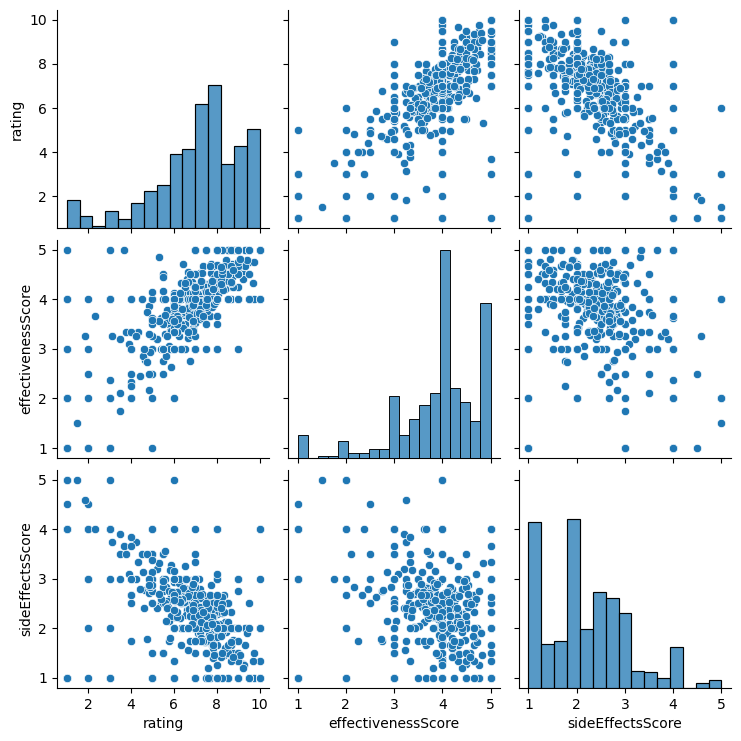

In [42]:
sb.pairplot(table2)

One of the things we have to note in that effectivenessScore and sideEffectsScore seems like they might be correlated! Let's create a correlation matrix to check for this!

<Axes: >

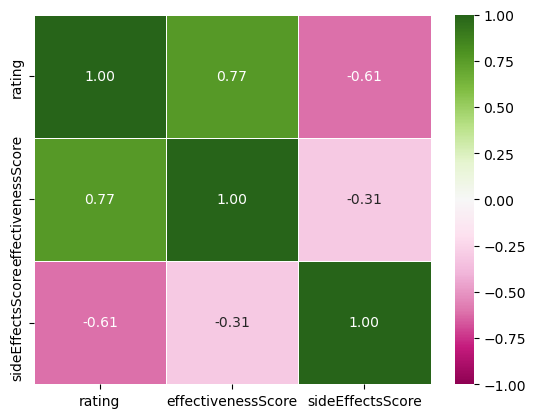

In [43]:
sb.heatmap(table2.corr(), annot=True, linewidth=.5, cmap="PiYG", fmt=".2f", vmin = -1, vmax = 1)

There is a slight negative correlation between effectivenessScore and sideEffectsScore, not enough to count as colinear so we could fit a linear model directly if we so choose. But just for fun I will still try a regularization procedure that requires hyperparameter tuning known as ridge regression. 

I do want to fit a regression to see if our regression coefficients are significant or not, using t-tests

In [44]:
smf.ols('rating ~ effectivenessScore + sideEffectsScore', data=table2).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.742    
Dependent Variable:  rating           AIC:                1609.8503
Date:                2024-06-05 09:28 BIC:                1622.7305
No. Observations:    541              Log-Likelihood:     -801.93  
Df Model:            2                F-statistic:        778.0    
Df Residuals:        538              Prob (F-statistic): 1.75e-159
R-squared:           0.743            Scale:              1.1414   
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           3.2420   0.2837  11.4255 0.0000  2.6846  3.7994
effectivenessScore  1.5309   0.0553  27.6661 0.0000  1.4222  1.6396
sideEffectsScore   -1.0001   0.0552 -18.1266 0.0000 -1.1085 -0.8918
-------------------------------------------------------------------
Omnibus:               78.988       Durbin-Watson:          2.062  
Prob(Omnibus):         0.000        Jarque-Bera (JB):       380.061
Skew:                  -0.533       Prob(JB):               0.000  
Kurtosis:              6.966        Condition No.:          30     
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
"""

Based on the statistical tests above we can see that both effectivenessScore and sideEffectsScore have to be included for out regression analysis. 

We can also see that the F test tells us that we definitely need something larger than the null model. 

#### Summary (EDA)

From the looks of this, this problem can be taken care of using regression. There is noise in the data so I am inclined to believe that a linear model would be best if I have to stand in front of a group of C suites and explain what we can infer from our data. 

But I will fit other models just to see how well they will work, and since our goal isn't really interpretability we can see which performs better for prediction. 

The F test and t test above suggest that we definitely can use a model to explain the variability in the data beyond the null model. As for which model. we can find out in the next section. 

### Model Fitting

For this I will fit several models and evaluate them based on their prediction error since our goal here is prediction, not inference. 

In [45]:
y = np.array(table2.drop(['effectivenessScore', 'sideEffectsScore'], axis = 1))[:,0]
#print(y)
X = (table2.drop(['rating'], axis = 1))
#print(x)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size = 0.8, random_state=25)

#### Multiple Linear Regression

So let's begin with a simple linear regression, because based on the pairs plot it does seem like our data does show shmewhat of a linear structure.

I will fit an interaction here just to see if we should include the interaction term in the model or not. Interaction terms are needed for additive models like the linear model if we wish to capture how features interact with each other.

In [47]:
from sklearn.linear_model import LinearRegression
train, test = train_test_split(table2, test_size=0.2, train_size = 0.8, random_state=25)
linearModel = smf.ols('rating ~ effectivenessScore * sideEffectsScore', data=(train)).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     527.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.67e-143
Time:                        09:28:03   Log-Likelihood:                -594.59
No. Observations:                 432   AIC:                             1197.
Df Residuals:                     428   BIC:                             1213.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.5508      0.475      3.265      0.001       0.617       2.484
effectivenessScore                      1.9349      0.116     16.689      0.000       1.707       2.163
sideEffectsScore                       -0.3669      0.172     -2.139      0.033      -0.704      -0.030
effectivenessScore:sideEffectsScore    -0.1461      0.045     -3.242      0.001      -0.235      -0.058
==============================================================================
Omnibus:                       27.582   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.715
Skew:                          -0.035   Prob(JB):                     9.97e-22
Kurtosis:                       5.317   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It looks like the interaction term is statistically significant so we should include it actually. But just for the sake of argument let's fit a model without an interaction term and we will see in the end which is better. 

In [48]:
linearModelNoInt = smf.ols('rating ~ effectivenessScore + sideEffectsScore', data=(train)).fit()
linearModelNoInt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     768.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.53e-142
Time:                        09:28:03   Log-Likelihood:                -599.83
No. Observations:                 432   AIC:                             1206.
Df Residuals:                     429   BIC:                             1218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.7789      0.290      9.588      0.000       2.209       3.349
effectivenessScore     1.6045      0.056     28.696      0.000       1.495       1.714
sideEffectsScore      -0.8908      0.058    -15.311      0.000      -1.005      -0.776
==============================================================================
Omnibus:                       35.645   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.638
Skew:                          -0.037   Prob(JB):                     7.96e-36
Kurtosis:                       5.996   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Generalized Additive Model (Regression)

##### For this next model i will use a model not taught in this class: The generalized additive model. 

In short it is a blend between parametric and nonparametric models.

Generalized additive models is a more general model that allows us to fit nonlinear relationships for each feature to the response. It still complies with the additive framework that allows us to tease apart the effects of the various features.

For this generalized additive model i am fitting an interaction term, because just like in the linear model, we need an interaction term to account for the interactions between the features. 

In this case I am fitting a function known as a spline to each of the features. 

In [49]:
from statsmodels.gam.api import GLMGam, BSplines, CyclicCubicSplines
x_spline = train[['effectivenessScore', 'sideEffectsScore']]
bs = BSplines(x_spline, df=[4, 4], degree=[3, 3]) # this here specifies the spline type
gam = GLMGam.from_formula('rating ~ effectivenessScore * sideEffectsScore', data=train, smoother = bs).fit()
gam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 rating   No. Observations:                  432
Model:                         GLMGam   Df Residuals:                   424.00
Model Family:                Gaussian   Df Model:                         7.00
Link Function:               Identity   Scale:                         0.85592
Method:                         PIRLS   Log-Likelihood:                -575.34
Date:                Wed, 05 Jun 2024   Deviance:                       362.91
Time:                        09:28:03   Pearson chi2:                     363.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9827
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.5858      0.513      1.142      0.254      -0.420       1.592
effectivenessScore                      2.0634      0.119     17.289      0.000       1.830       2.297
sideEffectsScore                       -0.0730      0.155     -0.472      0.637      -0.376       0.230
effectivenessScore:sideEffectsScore    -0.2392      0.050     -4.824      0.000      -0.336      -0.142
effectivenessScore_s0                   0.6817      0.527      1.294      0.196      -0.351       1.714
effectivenessScore_s1                  -0.1680      0.305     -0.551      0.582      -0.766       0.430
effectivenessScore_s2                   0.2542      0.121      2.107      0.035       0.018       0.491
sideEffectsScore_s0                     1.8903      0.358      5.284      0.000       1.189       2.591
sideEffectsScore_s1                    -0.6858      0.563     -1.219      0.223      -1.789       0.417
sideEffectsScore_s2                    -0.3376      0.316     -1.067      0.286      -0.957       0.282
=======================================================================================================
"""

I have to be honest. This GAM in python is not as easy to use compared to its counterpart in R. I will not conduct cross validation for this model because its just a pain to implement. Plus I can do cross validation with the other models that I will try. Besides, if it was up to me I would probably have exported the data and used R to fit the GAM model. 

The df in BSplines here is the degrees of freedom, its related to the knots that the spline has where $df = knots + degree$

#### Ridge Regression

##### This is another model not covered in class

Let's then attempt to fit the ridge regression, for this i will tune the regularization parameter. 

For those that don't know ridge regression addresses collinearity and thus overfitting by penalizing the MSE we minimize. 

I will not use LASSO because the feature space is not sparse in this case, so there is no point in using L1 regularization.

In [43]:
from sklearn.model_selection import GridSearchCV

{'alpha': 1.515716566510398}


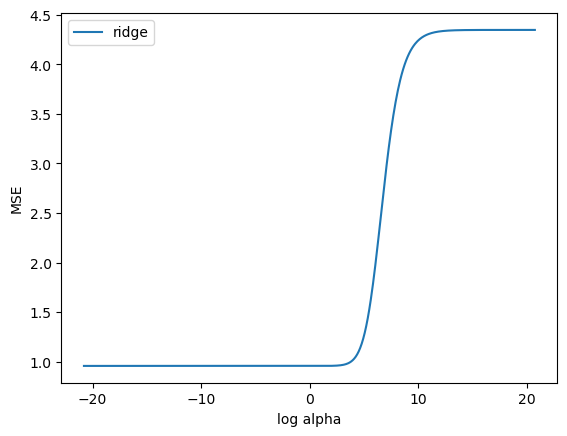

In [51]:
from sklearn.linear_model import Ridge
alphaVals = list(range(-300,300))
alphaVals = [(2)**(x/10) for x in alphaVals]
alphas = {'alpha': alphaVals}
ridgeGrid = GridSearchCV(estimator = Ridge(), param_grid = alphas, scoring = 'neg_mean_squared_error',
                       cv = 5, verbose = 0).fit(X_train, y_train)
print(ridgeGrid.best_params_)


#ridgeGrid.cv_results_
#scores = [x[1] for x in ridgeGrid.cv_results_['mean_test_score']]
#scores = np.array(scores).reshape(len(alphaVals))
fig, ax = plt.subplots()
# because this tuning uses negative MSE, I am going to have to convert it into MSE to plot
# same with all subsequent
ax.plot(np.log(alphaVals),-1*ridgeGrid.cv_results_['mean_test_score'], label = 'ridge')
ax.set_ylabel("MSE")
ax.set_xlabel("log alpha")
ax.legend()

Interesting. Looks like some regularization (reduction of overfitting) can slightly improve the performance of the model, even though collinearlity really isn't an issue. 

#### KNN regression

Let's also try KNN, we will also be tuning k. Curse of dimentionality is not a problem here because out data is not high dimentional, we also don't need to scale features because they are in the same scale.

{'n_neighbors': 6}

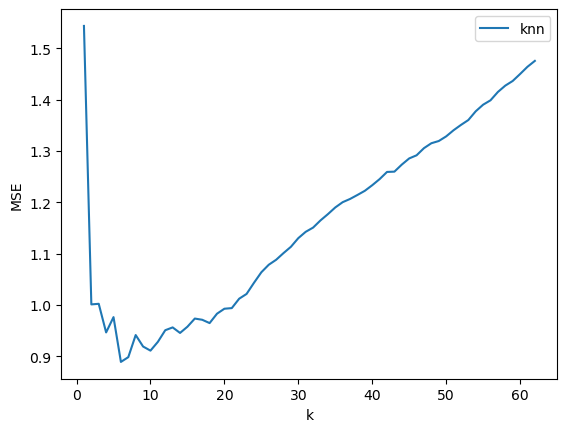

In [52]:
from sklearn.neighbors import KNeighborsRegressor

kVal = {'n_neighbors': list(range(1,63))}
#print(kVal)
knnGrid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = kVal, scoring = 'neg_mean_squared_error',
                       cv = 5).fit(X_train, y_train)

fig, ax = plt.subplots()
ax.plot(list(range(1,63)),-1*knnGrid.cv_results_['mean_test_score'], label = 'knn')
ax.set_ylabel("MSE")
ax.set_xlabel("k")
ax.legend()

knnGrid.best_params_

#### Decision Tree regression

Let's now try to use regression trees, let's tune just ccp_alpha for now, so we have an easier plot

{'ccp_alpha': 0.011}

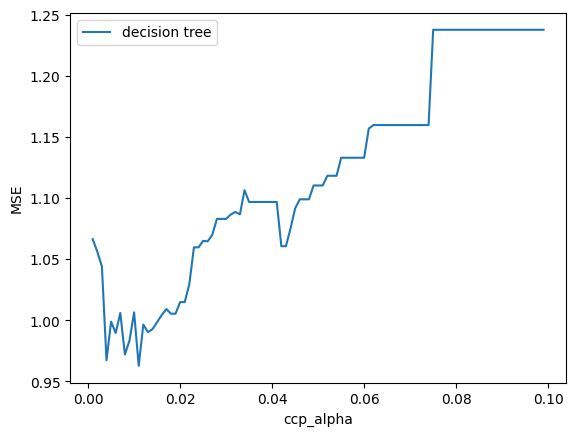

In [47]:
from sklearn.tree import DecisionTreeRegressor
alphaVal = list(range(1,100))

alphaVal = [(x/1000) for x in alphaVal]
TreeParamGridAlpha = {'ccp_alpha': alphaVal}

DTGrid = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = TreeParamGridAlpha, scoring = 'neg_mean_squared_error',
                       cv = 5).fit(X_train, y_train)
fig, ax = plt.subplots()
ax.plot(alphaVal,-1*DTGrid.cv_results_['mean_test_score'], label = 'decision tree')
ax.set_ylabel("MSE")
ax.set_xlabel("ccp_alpha")
ax.legend()
#{'max_depth': list(range(1,61)), 'min_samples_split': list(range(2,61)), 
#                 'min_samples_leaf': list(range(1,61)), ccp_alpha}
DTGrid.best_params_

In [48]:
DT_model = DTGrid.best_estimator_

[Text(0.5, 0.875, 'x[0] <= 3.596\nsquared_error = 4.312\nsamples = 432\nvalue = 7.123'),
 Text(0.25, 0.625, 'x[0] <= 2.562\nsquared_error = 3.913\nsamples = 108\nvalue = 4.807'),
 Text(0.125, 0.375, 'x[0] <= 1.625\nsquared_error = 2.333\nsamples = 34\nvalue = 2.811'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[1] <= 3.583\nsquared_error = 1.969\nsamples = 74\nvalue = 5.724'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[1] <= 2.129\nsquared_error = 2.061\nsamples = 324\nvalue = 7.895'),
 Text(0.625, 0.375, 'x[0] <= 4.732\nsquared_error = 1.143\nsamples = 198\nvalue = 8.56'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[0] <= 4.168\nsquared_error = 1.719\nsamples = 126\nvalue = 6.851'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

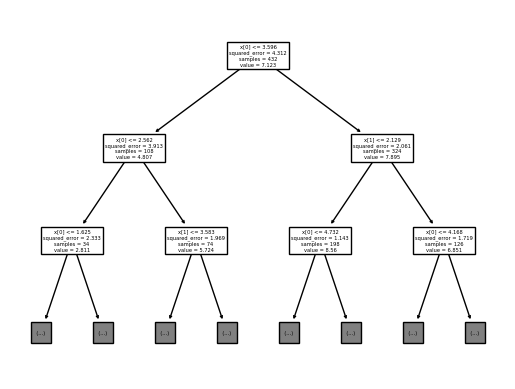

In [51]:
from sklearn.tree import plot_tree

plot_tree(DT_model, max_depth = 2)

#### GBM regression

Let's also try to use gradient boost regression. I made the grid less dense because running cross validation takes forever otherwise.

Random forest is not suitable for this problem because our feature space is low dimentional, plus square root of 2 just doesn't make sense anyways. 

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


learningRate = list(range(1,20))
learningRate = [(x/100) for x in learningRate]
GBMParamGrid = {'learning_rate': learningRate, 'n_estimators': list(range(10,100, 10))}
GBMGrid = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = GBMParamGrid, scoring = 'neg_mean_squared_error',
                       cv = 5).fit(X_train, y_train)
GBMGrid.best_params_

{'learning_rate': 0.11, 'n_estimators': 30}

#### SVR

Lets also try to do this regression using SVM, I will not use the kernel trick because the runtime for cross validation is atrocious if I use the kernel trick. 

In [55]:
#I decided to supress this because the runtime is just atrocious, the neural network model next will do


from sklearn.svm import LinearSVR

cVal = list(range(-5,5))
#gammaVal = list(range(-5,5))
#gammaVal = [(2)**(x) for x in cVal]
cVal = [(2)**(x) for x in cVal]
#SVRParamGrid = {'C': cVal, 'kernel': ['rbf','linear','poly'], 'gamma': gammaVal}
SVRParamGrid = {'C': cVal}

#SVRGrid = GridSearchCV(estimator = SVR(), param_grid = SVRParamGrid, scoring = 'neg_mean_squared_error',
#                       cv = 10).fit(X_train, y_train)

SVRGrid = GridSearchCV(estimator = LinearSVR(max_iter = 40000, dual = 'auto'), param_grid = SVRParamGrid, scoring = 'neg_mean_squared_error',
                       cv = 5).fit(X_train, y_train)
SVRGrid.best_params_



{'C': 0.5}

In [56]:
#SVRGrid.best_score_

#### Neural Network

##### Now for another model not covered in class: Neural Networks

And just to top it all off, let's do neural networks too! This is just to flex, i can already tell this is overkill. For simplicity I am only using a single hidden layer. I will be tuning the size of that hidden layer and the activation function.

In [57]:
from sklearn.neural_network import MLPRegressor

NNParamGrid = {'hidden_layer_sizes': [[1],[2],[3],[4]], 
                'activation': ['identity', 'logistic', 'tanh', 'relu']}

NNGrid = GridSearchCV(estimator = MLPRegressor(learning_rate = 'invscaling', max_iter = 8000, early_stopping = True), param_grid = NNParamGrid, scoring = 'neg_mean_squared_error',
                       cv = 5).fit(X_train, y_train)
NNGrid.best_params_

{'activation': 'identity', 'hidden_layer_sizes': [4]}

In [58]:
#NNGrid.best_score_

### Results and Analysis

Let's now use each one of these models to predict the test set and see what our prediction error is like

In [59]:
ridgeModel = ridgeGrid.best_estimator_
knnModel = knnGrid.best_estimator_
DTModel = DTGrid.best_estimator_
GBMModel = GBMGrid.best_estimator_
SVRModel = SVRGrid.best_estimator_
NNModel = NNGrid.best_estimator_

In [60]:
linearPrediction = linearModel.predict(X_test)
linearNoIntPrediction = linearModelNoInt.predict(X_test)
gamPrediction = gam.predict(X_test, exog_smooth= X_test[['effectivenessScore', 'effectivenessScore']])

In [61]:
#gamPrediction = gam.predict(test, exog_smooth= test[['effectivenessScore', 'effectivenessScore']])
ridgePrediction = ridgeModel.predict(X_test)
knnPrediction = knnModel.predict(X_test)
DTPrediction = DTModel.predict(X_test)
GBMPrediction = GBMModel.predict(X_test)
SVRPrediction = SVRModel.predict(X_test)
NNPrediction = NNModel.predict(X_test)

In [62]:
def predictionErrors(errorFuction, linearPrediction, linearNoIntPrediction, gamPrediction, ridgePrediction, knnPrediction, 
                    DTPrediction, GBMPrediction, SVRPrediction, NNPrediction):
    linearPredictionError = errorFuction(linearPrediction)
    linearNoIntPredictionError = errorFuction(linearNoIntPrediction)
    gamPredictionError = errorFuction(gamPrediction)
    ridgePredictionError = errorFuction(ridgePrediction)
    knnPredictionError = errorFuction(knnPrediction)
    DTPredictionError = errorFuction(DTPrediction)
    GBMPredictionError = errorFuction(GBMPrediction)
    SVRPredictionError = errorFuction(SVRPrediction)
    NNPredictionError = errorFuction(NNPrediction)
    return(linearPredictionError, linearNoIntPredictionError, gamPredictionError, ridgePredictionError, knnPredictionError, 
          DTPredictionError, GBMPredictionError, SVRPredictionError, NNPredictionError)

In [63]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, round(y[i],3), ha = 'center')

#### Model evaluation using MSE

In [64]:
from sklearn.metrics import mean_squared_error

def mse(pred): 
    actual, pred = np.array(y_test), np.array(pred)
    return mean_squared_error(actual, pred)

In [65]:
MSEs = predictionErrors(mse, linearPrediction, linearNoIntPrediction, gamPrediction, ridgePrediction, knnPrediction, 
                DTPrediction, GBMPrediction, SVRPrediction, NNPrediction)

In [66]:
'''
linearPredictionMSE = mse(linearPrediction)
linearNoIntPredictionMSE = mse(linearNoIntPrediction)
gamPredictionMSE = mse(gamPrediction)
ridgePredictionMSE = mse(ridgePrediction)
knnPredictionMSE = mse(knnPrediction)
DTPredictionMSE = mse(DTPrediction)
GBMPredictionMSE = mse(GBMPrediction)
SVRPredictionMSE = mse(SVRPrediction)
NNPredictionMSE = mse(NNPrediction)
'''

In [67]:
print(MSEs)

(1.849838552512279, 1.973411864036024, 1.8030875221343678, 1.9727475402204442, 1.9894114886541556, 2.5050504875401503, 2.0842461409073048, 2.0424947844688464, 2.2940860609295646)


Text(0.5, 1.0, 'MSE for each model')

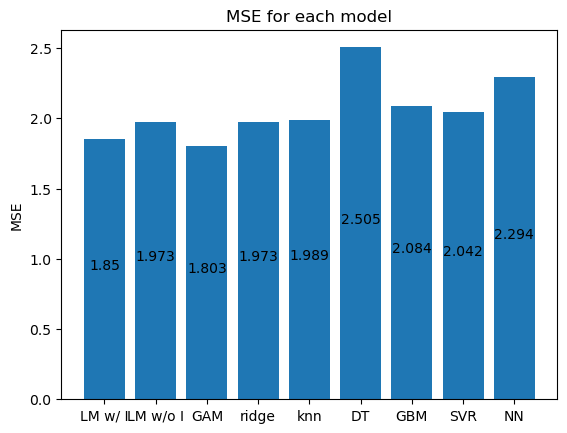

In [68]:
errors = MSEs
Names = ['LM w/ I', 'LM w/o I', 'GAM', 'ridge', 'knn', 'DT', 'GBM', 'SVR', 'NN']

fig, ax = plt.subplots()
ax.bar(Names, errors)
addlabels(Names, errors)
ax.set_ylabel('MSE')
ax.set_title('MSE for each model')

So it looks like the generalized additive model works best according to this metric, let's try another metric.

#### Model evaluation using MAE

In [69]:
from sklearn.metrics import mean_absolute_error

def mae(pred): 
    actual, pred = np.array(y_test), np.array(pred)
    return mean_absolute_error(actual, pred)

In [70]:
MAEs = predictionErrors(mae, linearPrediction, linearNoIntPrediction, gamPrediction, ridgePrediction, knnPrediction, 
                DTPrediction, GBMPrediction, SVRPrediction, NNPrediction)

In [71]:
print(MAEs)

(0.9015107333474756, 0.9136407594524861, 1.0202323387867869, 0.9141988981347154, 0.9082169967586483, 1.0426311839023479, 0.9282400956056871, 0.9232267675733795, 0.9850967921463462)


Text(0.5, 1.0, 'MAE for each model')

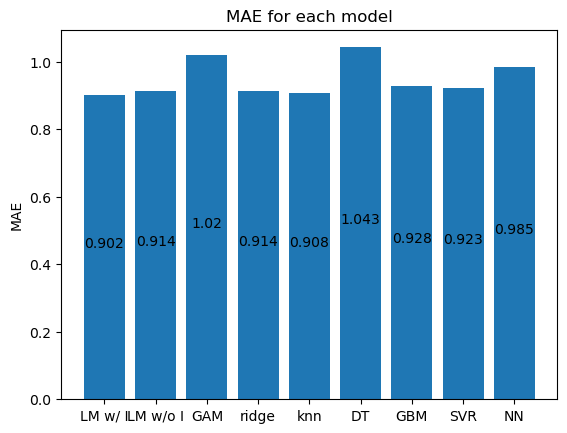

In [72]:
errors = MAEs
Names = ['LM w/ I', 'LM w/o I', 'GAM', 'ridge', 'knn', 'DT', 'GBM', 'SVR', 'NN']

fig, ax = plt.subplots()
ax.bar(Names, errors)
addlabels(Names, errors)
ax.set_ylabel('MAE')
ax.set_title('MAE for each model')

According to the mean absolute error metric the linear model with the interaction is the best. 

#### Model evaluation using RMSE

In [73]:
#from sklearn.metrics import root_mean_squared_error

def rmse(pred): 
    actual, pred = np.array(y_test), np.array(pred)
    return np.sqrt(mean_squared_error(actual, pred))

In [74]:
RMSEs = predictionErrors(rmse, linearPrediction, linearNoIntPrediction, gamPrediction, ridgePrediction, knnPrediction, 
                DTPrediction, GBMPrediction, SVRPrediction, NNPrediction)

In [75]:
print(RMSEs)

(1.3600877003018148, 1.4047817852022513, 1.342790945059717, 1.4045453144062117, 1.410464990226328, 1.582735128674457, 1.4436918441645727, 1.4291587681111033, 1.51462406587561)


Text(0.5, 1.0, 'RMSE for each model')

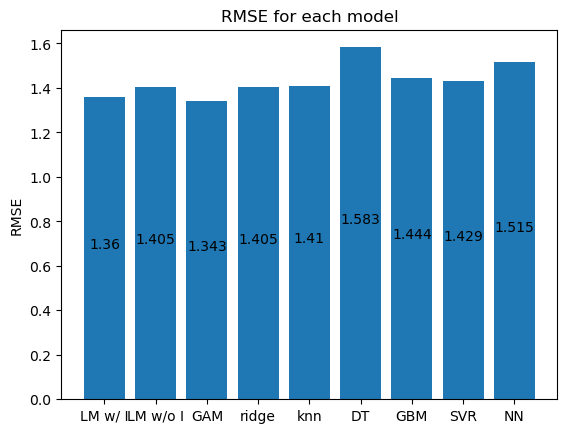

In [76]:
errors = RMSEs
Names = ['LM w/ I', 'LM w/o I', 'GAM', 'ridge', 'knn', 'DT', 'GBM', 'SVR', 'NN']

fig, ax = plt.subplots()
ax.bar(Names, errors)
addlabels(Names, errors)
ax.set_ylabel('RMSE')
ax.set_title('RMSE for each model')

What we see is that the GAM has lower squared error and root squared error while the linear model with interaction seems to have lower absolute error. 

So depending on the severity of having large prediction errors as compared to smaller prediction errors we could either go with the linear model with interaction or go with the generalized additive model. 

Let's investigate why this is the case:

Text(0.5, 1.0, 'Residual vs fitted plot, OLS')

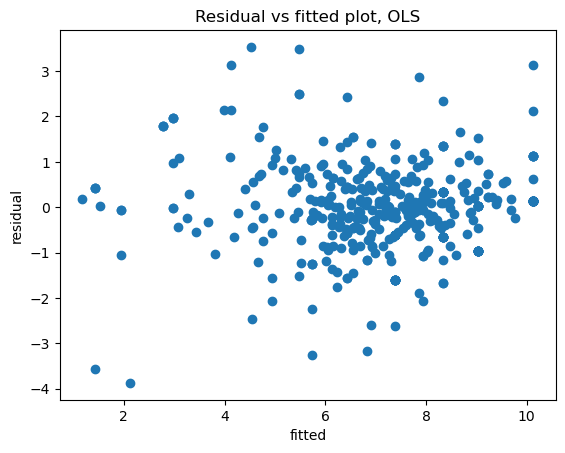

In [93]:
residuals = (linearModel.predict(train) - y_train)
fig, ax = plt.subplots()
ax.scatter(linearModel.predict(train),residuals)
ax.set_ylabel('residual')
ax.set_xlabel('fitted')
ax.set_title('Residual vs fitted plot, OLS')


Text(0.5, 1.0, 'Residual vs fitted plot, GAM')

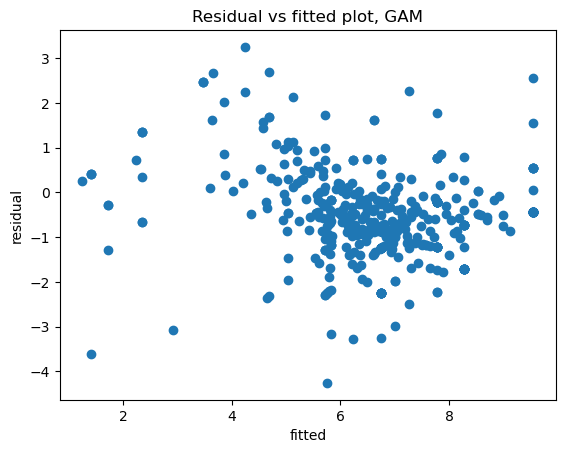

In [94]:
residuals = (gam.predict(train, exog_smooth= train[['effectivenessScore', 'effectivenessScore']]) - y_train)

fig, ax = plt.subplots()
ax.scatter(gam.predict(train, exog_smooth= train[['effectivenessScore', 'effectivenessScore']]),residuals)
ax.set_ylabel('residual')
ax.set_xlabel('fitted')
ax.set_title('Residual vs fitted plot, GAM')

We do see that the GAM does seem to give smaller residuals than the linear model in general. THough GAM also seems to be slightly biased based on the distribution of the residuals. 

Let's see if KNN did better:

Text(0.5, 1.0, 'Residual vs fitted plot, KNN')

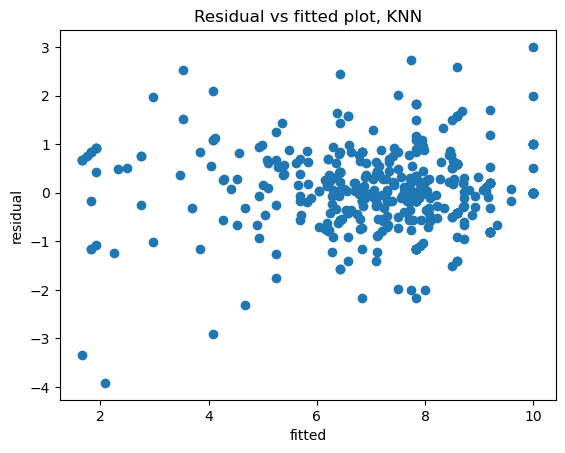

In [95]:
residuals = (knnModel.predict(X_train) - y_train)

fig, ax = plt.subplots()
ax.scatter(knnModel.predict(X_train),residuals)
ax.set_ylabel('residual')
ax.set_xlabel('fitted')
ax.set_title('Residual vs fitted plot, KNN')

a bit better but still a bit of a structure we can see

Here is another idea then. can we transform our features? This will reduce interpretability slightly but that should not be important. For this part I will only fit linear regression models. 

                rating  effectivenessScore  sideEffectsScore
urlDrugName                                                 
abilify      28.890625           13.140625          6.250000
acanya       81.000000           25.000000          4.000000
accolate      1.000000            1.000000          1.000000
accupril     81.000000           16.000000          1.000000
accutane     59.710744           20.455062          8.200413


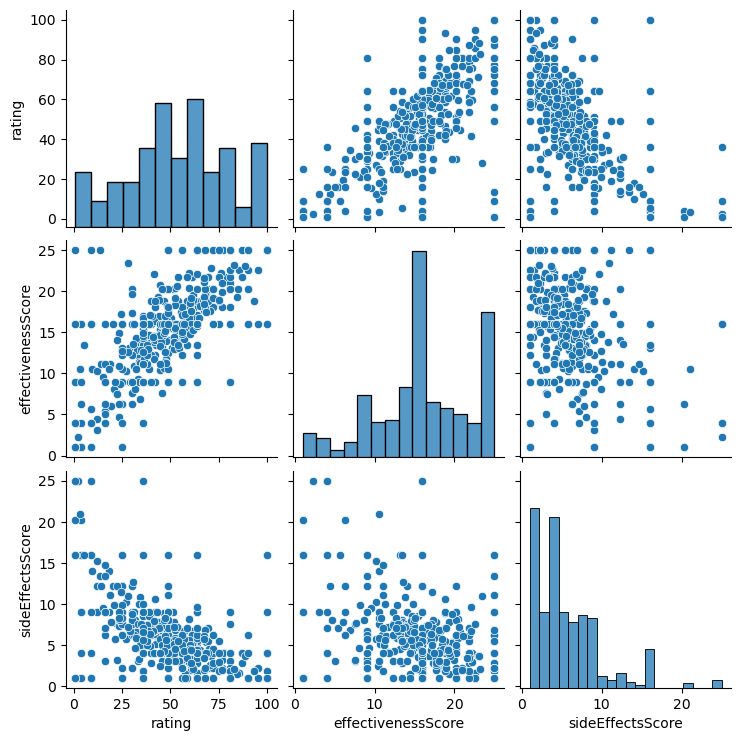

In [97]:
square_table2 = np.square(table2)
print(square_table2.head())
sb.pairplot(square_table2)

In [98]:
square_train, square_test = train_test_split(table2, test_size=0.2, train_size = 0.8, random_state=25)
square_train = np.square(square_train)
squareLinearModel = smf.ols('rating ~ effectivenessScore * sideEffectsScore', data=(square_train)).fit()
squareLinearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     499.0
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          2.67e-139
Time:                        23:06:53   Log-Likelihood:                -1697.6
No. Observations:                 432   AIC:                             3403.
Df Residuals:                     428   BIC:                             3419.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              10.5950      2.630      4.029      0.000       5.426      15.764
effectivenessScore                      3.5739      0.146     24.553      0.000       3.288       3.860
sideEffectsScore                       -0.6346      0.278     -2.287      0.023      -1.180      -0.089
effectivenessScore:sideEffectsScore    -0.1228      0.019     -6.605      0.000      -0.159      -0.086
==============================================================================
Omnibus:                       51.928   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.598
Skew:                           0.602   Prob(JB):                     4.38e-29
Kurtosis:                       5.410   Cond. No.                         436.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
squareLinearModelPrediction = squareLinearModel.predict(square_train)

In [100]:
residual = squareLinearModelPrediction - square_train['rating']

Text(0.5, 1.0, 'Residual vs fitted plot, transformed features linear regression')

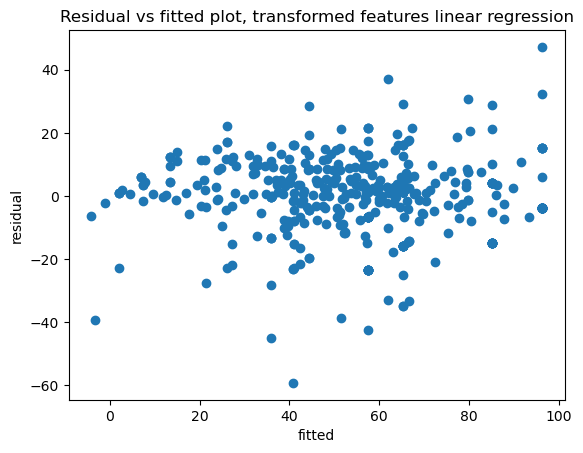

In [101]:
fig, ax = plt.subplots()
ax.scatter(squareLinearModelPrediction,residual)
ax.set_ylabel('residual')
ax.set_xlabel('fitted')
ax.set_title('Residual vs fitted plot, transformed features linear regression')

In [85]:
#from sklearn.metrics import r2_score
squareLinearModelPrediction = squareLinearModel.predict(np.square(square_test))
squareLinearModelPrediction[squareLinearModelPrediction < 0] = 0
#squareLinearModelPrediction.unique()
squareLinearModelPrediction = np.sqrt(squareLinearModelPrediction)

For the transformed model. To interpret it we have to take the square root of the prediction to get our actually predicted rating. I have zeroed out predictions that are negative so that we can actually do the transformation.

In [86]:
print(mean_squared_error(square_test['rating'], squareLinearModelPrediction))
print(mean_squared_error(test['rating'], linearPrediction))

1.8240206699679544
1.849838552512279


In [87]:
print(mean_absolute_error(square_test['rating'], squareLinearModelPrediction))
print(mean_absolute_error(test['rating'], linearPrediction))

0.9230276522223724
0.9015107333474756


Looks like our situation here is quite similar to the GAM case earlier. Recall that the GAM had lower MSE and RMSE than the linear model with interaction but had higher MAE. Looks like we have a similar situation here. 

#### summary

It looks like that both the GAM and our transformed linear models have higher MAE than just the regular linear model but have lower MSE. This is a rather interesting development. So depending on what we think of large deviations from the prediction as compared to small deviations from the prediction, we could go with either camp. 

The Neural network model seems to be the most unstable during hyperparameter tuning, potentially suggesting overfitting. The other models tend to give rather similar prediction errors between iterations. 

### Discussions

##### My takeaways are as follows:

The model of choice based on occam's razor would be the linear model with an interaction term, but if we only really care about prediction accuracy we can also use the GAM. The more complex models do not really perform better, so sometimes simpler is better. 

The ridge regression model in sklearn does not seem to allow an interaction term. We did see very slightly reduced prediction errors compared to OLS without an interaction term. 

##### Things that didn't work:

I wasn't able to include a condition type feature into the final dataset. The reason is that when I looked at the unique values inside it there was close to 2000 different values, and a lot of the entires have typos and stuff, so it would not be possible to use this variable in the model for now. I do hope I can include it at some point doen the line. 

##### Ways to improve:

I believe that if I was able to classify the condition into groups (e.g. pain, curculatory, etc.) we could also tease apart if the type of condition a drug treats affects the rating. However, that is probably a project all by itself, potentially an unsupervised learning project. So I may revisit this project down the line. 

Another way that I think we can improve is by weighting the importance of each point in the estimation procedure when fitting the model by the number of reviews that made up the data point. I could think of a few ways to implement this. 

# That is all, thank you for reading!

# Below are stuff i am not including in the final project. You Do not need to grade the stuff below.

#### Data understanding (table 1)

Lets start by figuring out what we are dealing with for table 1:

In [88]:
train1_raw.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [89]:
print(train1_raw.dtypes)

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object


In [90]:
train1_raw.shape

(161297, 7)

Now let's look at the test set, I will use this to do final model selection

In [91]:
print(test1_raw.dtypes)

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object


In [92]:
test1_raw.shape

(53766, 7)

Okay. For the first dataset we see that the train set contains 161297 total reviews with 7 features. 
For the first test set we have 53766 reviews with 7 features. 

For the analysis i wish to conduct I will have to aggregate the reviews for each singular drug into a single general review. As a result looks like I will have to recreate the training and testing sets after i merge everyting on 